## **Necessary Imports**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

## **Loading the data and data exploration**

In [3]:
df= pd.read_csv('creditcarddata.csv')

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

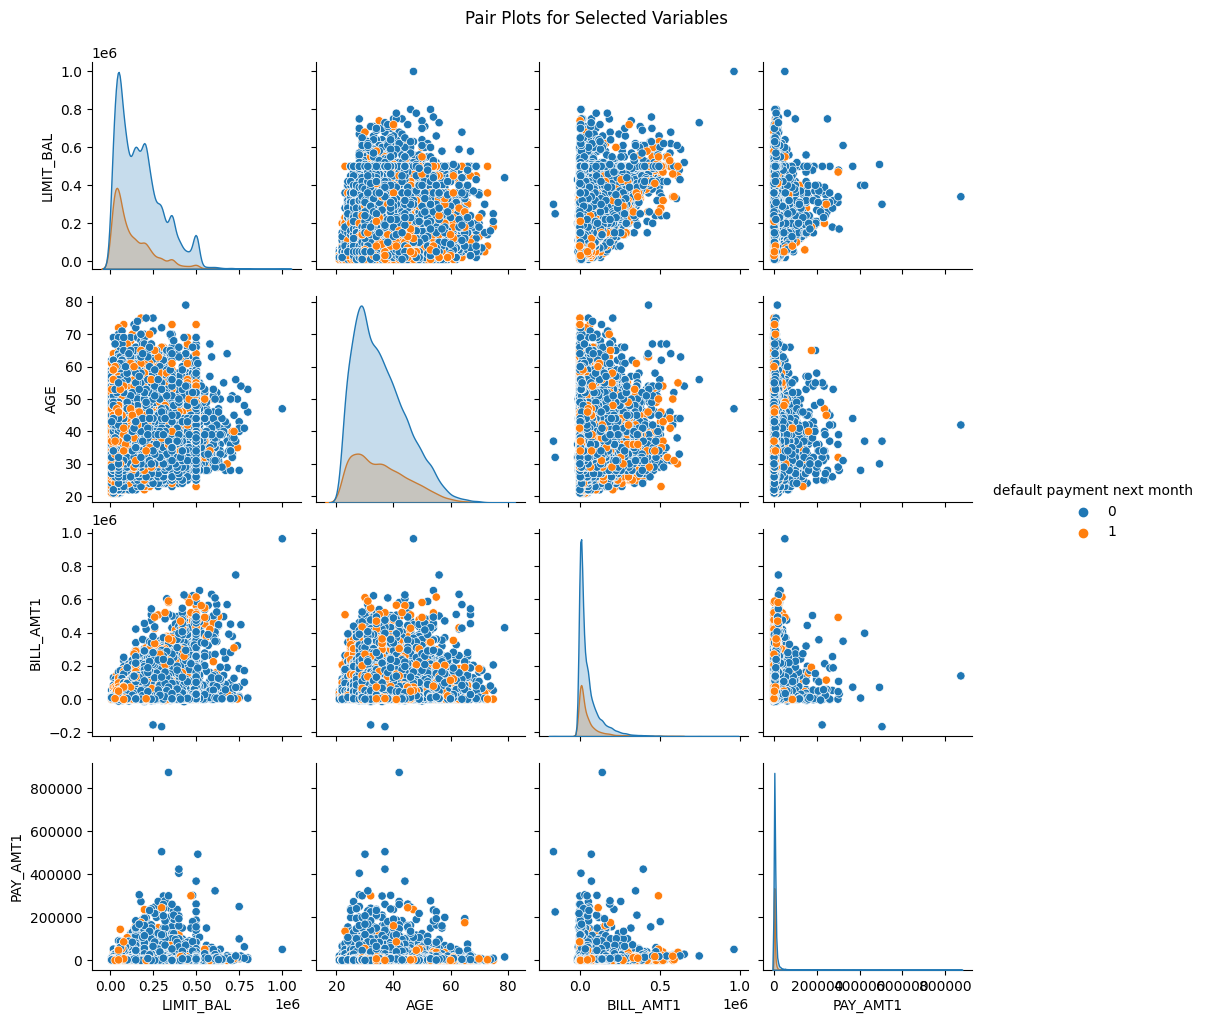

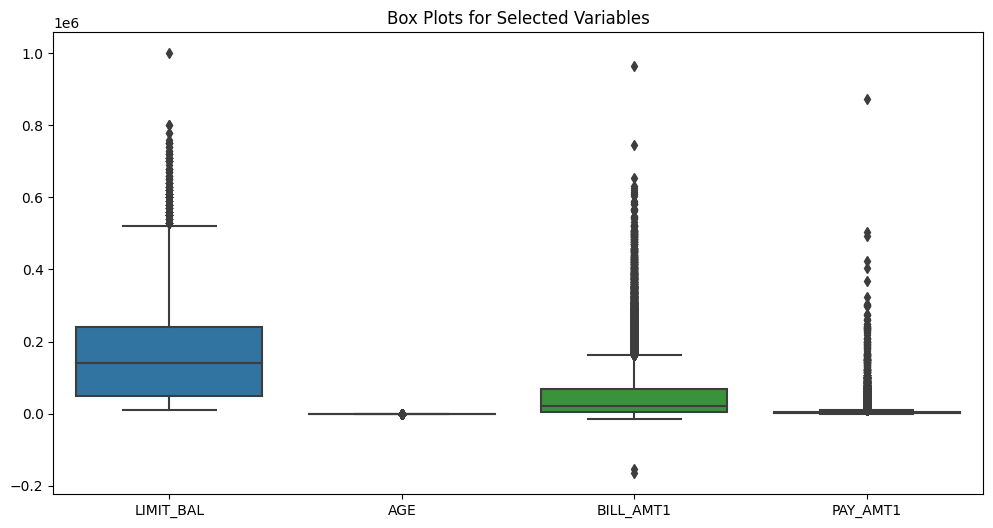

In [5]:
# Select a subset of variables for pair plots
pair_plot_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1']

# Create pair plots
sns.pairplot(df[pair_plot_vars + ['default payment next month']], hue='default payment next month')
plt.suptitle('Pair Plots for Selected Variables', y=1.02)
plt.show()

# Select a subset of variables for box plots
box_plot_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1']

# Create box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[box_plot_vars])
plt.title('Box Plots for Selected Variables')
plt.show()

In [14]:
from scipy import stats

# Select variables for statistical analysis
selected_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1']

# Display summary statistics
summary_stats = df[selected_vars].describe()
print("Summary Statistics:")
print(summary_stats)

# Perform t-test on 'LIMIT_BAL' between default and non-default groups
default_group = df[df['default payment next month'] == 1]['LIMIT_BAL']
non_default_group = df[df['default payment next month'] == 0]['LIMIT_BAL']

t_statistic, p_value = stats.ttest_ind(default_group, non_default_group)
print("\nT-Test Results:")
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Perform correlation analysis between 'LIMIT_BAL' and 'AGE'
correlation_coefficient, p_value_corr = stats.pearsonr(df['LIMIT_BAL'], df['AGE'])
print("\nCorrelation Analysis Results:")
print(f'Correlation Coefficient: {correlation_coefficient}')
print(f'P-Value: {p_value_corr}')

Summary Statistics:
            LIMIT_BAL           AGE      BILL_AMT1       PAY_AMT1
count    30000.000000  30000.000000   30000.000000   30000.000000
mean    167484.322667     35.485500   51223.330900    5663.580500
std     129747.661567      9.217904   73635.860576   16563.280354
min      10000.000000     21.000000 -165580.000000       0.000000
25%      50000.000000     28.000000    3558.750000    1000.000000
50%     140000.000000     34.000000   22381.500000    2100.000000
75%     240000.000000     41.000000   67091.000000    5006.000000
max    1000000.000000     79.000000  964511.000000  873552.000000

T-Test Results:
T-Statistic: -26.908521684796522
P-Value: 1.3022439532597397e-157

Correlation Analysis Results:
Correlation Coefficient: 0.14471279755733596
P-Value: 4.355914983696601e-140


In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### **Correlation Matrix**

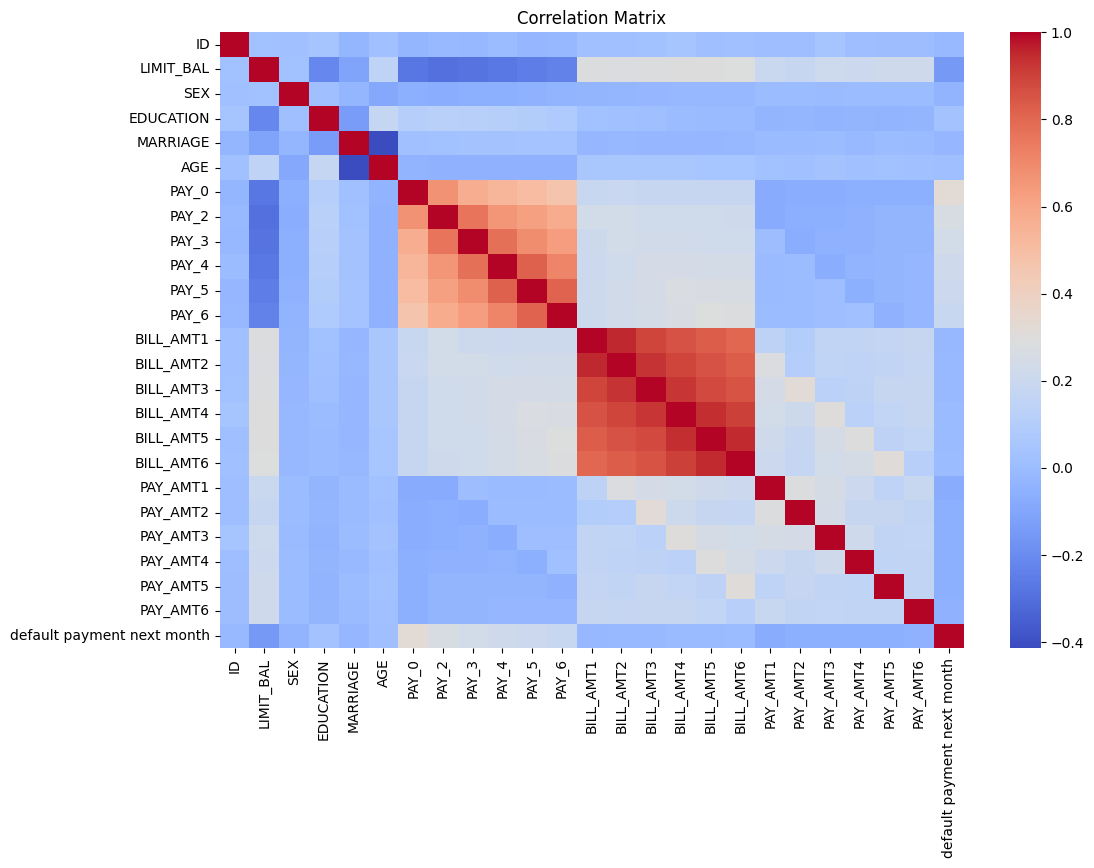

In [7]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

A correlation matrix IS a helpful step in feature selection and dimensionality reduction to avoid multicollinearity (high correlations between predictors), which can adversely affect predictive models like linear regression. When variables are highly correlated, it may be possible to remove one of the variables from the model without losing much predictive power.

### **Target Value Distribution**

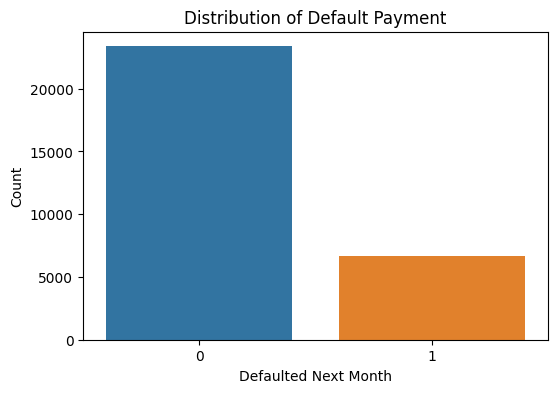

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='default payment next month', data=df)
plt.title("Distribution of Default Payment")
plt.xlabel("Defaulted Next Month")
plt.ylabel("Count")
plt.show()

This indicates that the dataset is unbalanced and skewed as one class is in majority whereas the other class is in minority as we can see a big difference in the number of samples per class

### Age Distribution

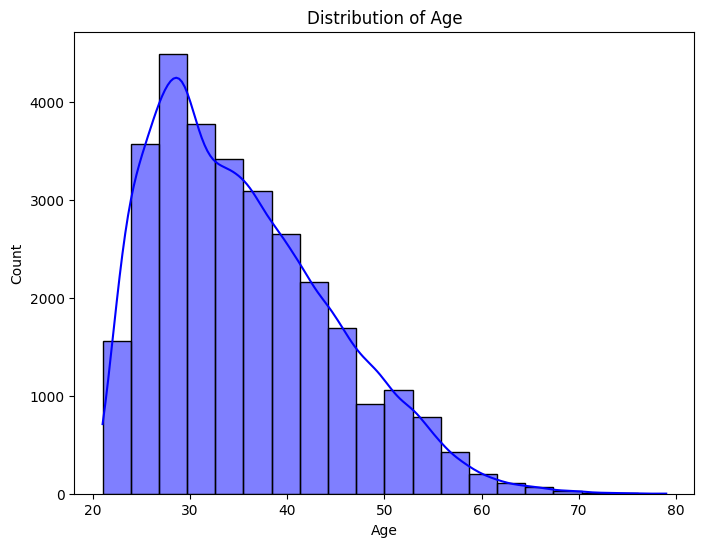

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['AGE'], kde=True, color='blue', bins=20)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Pair plot of selected variables

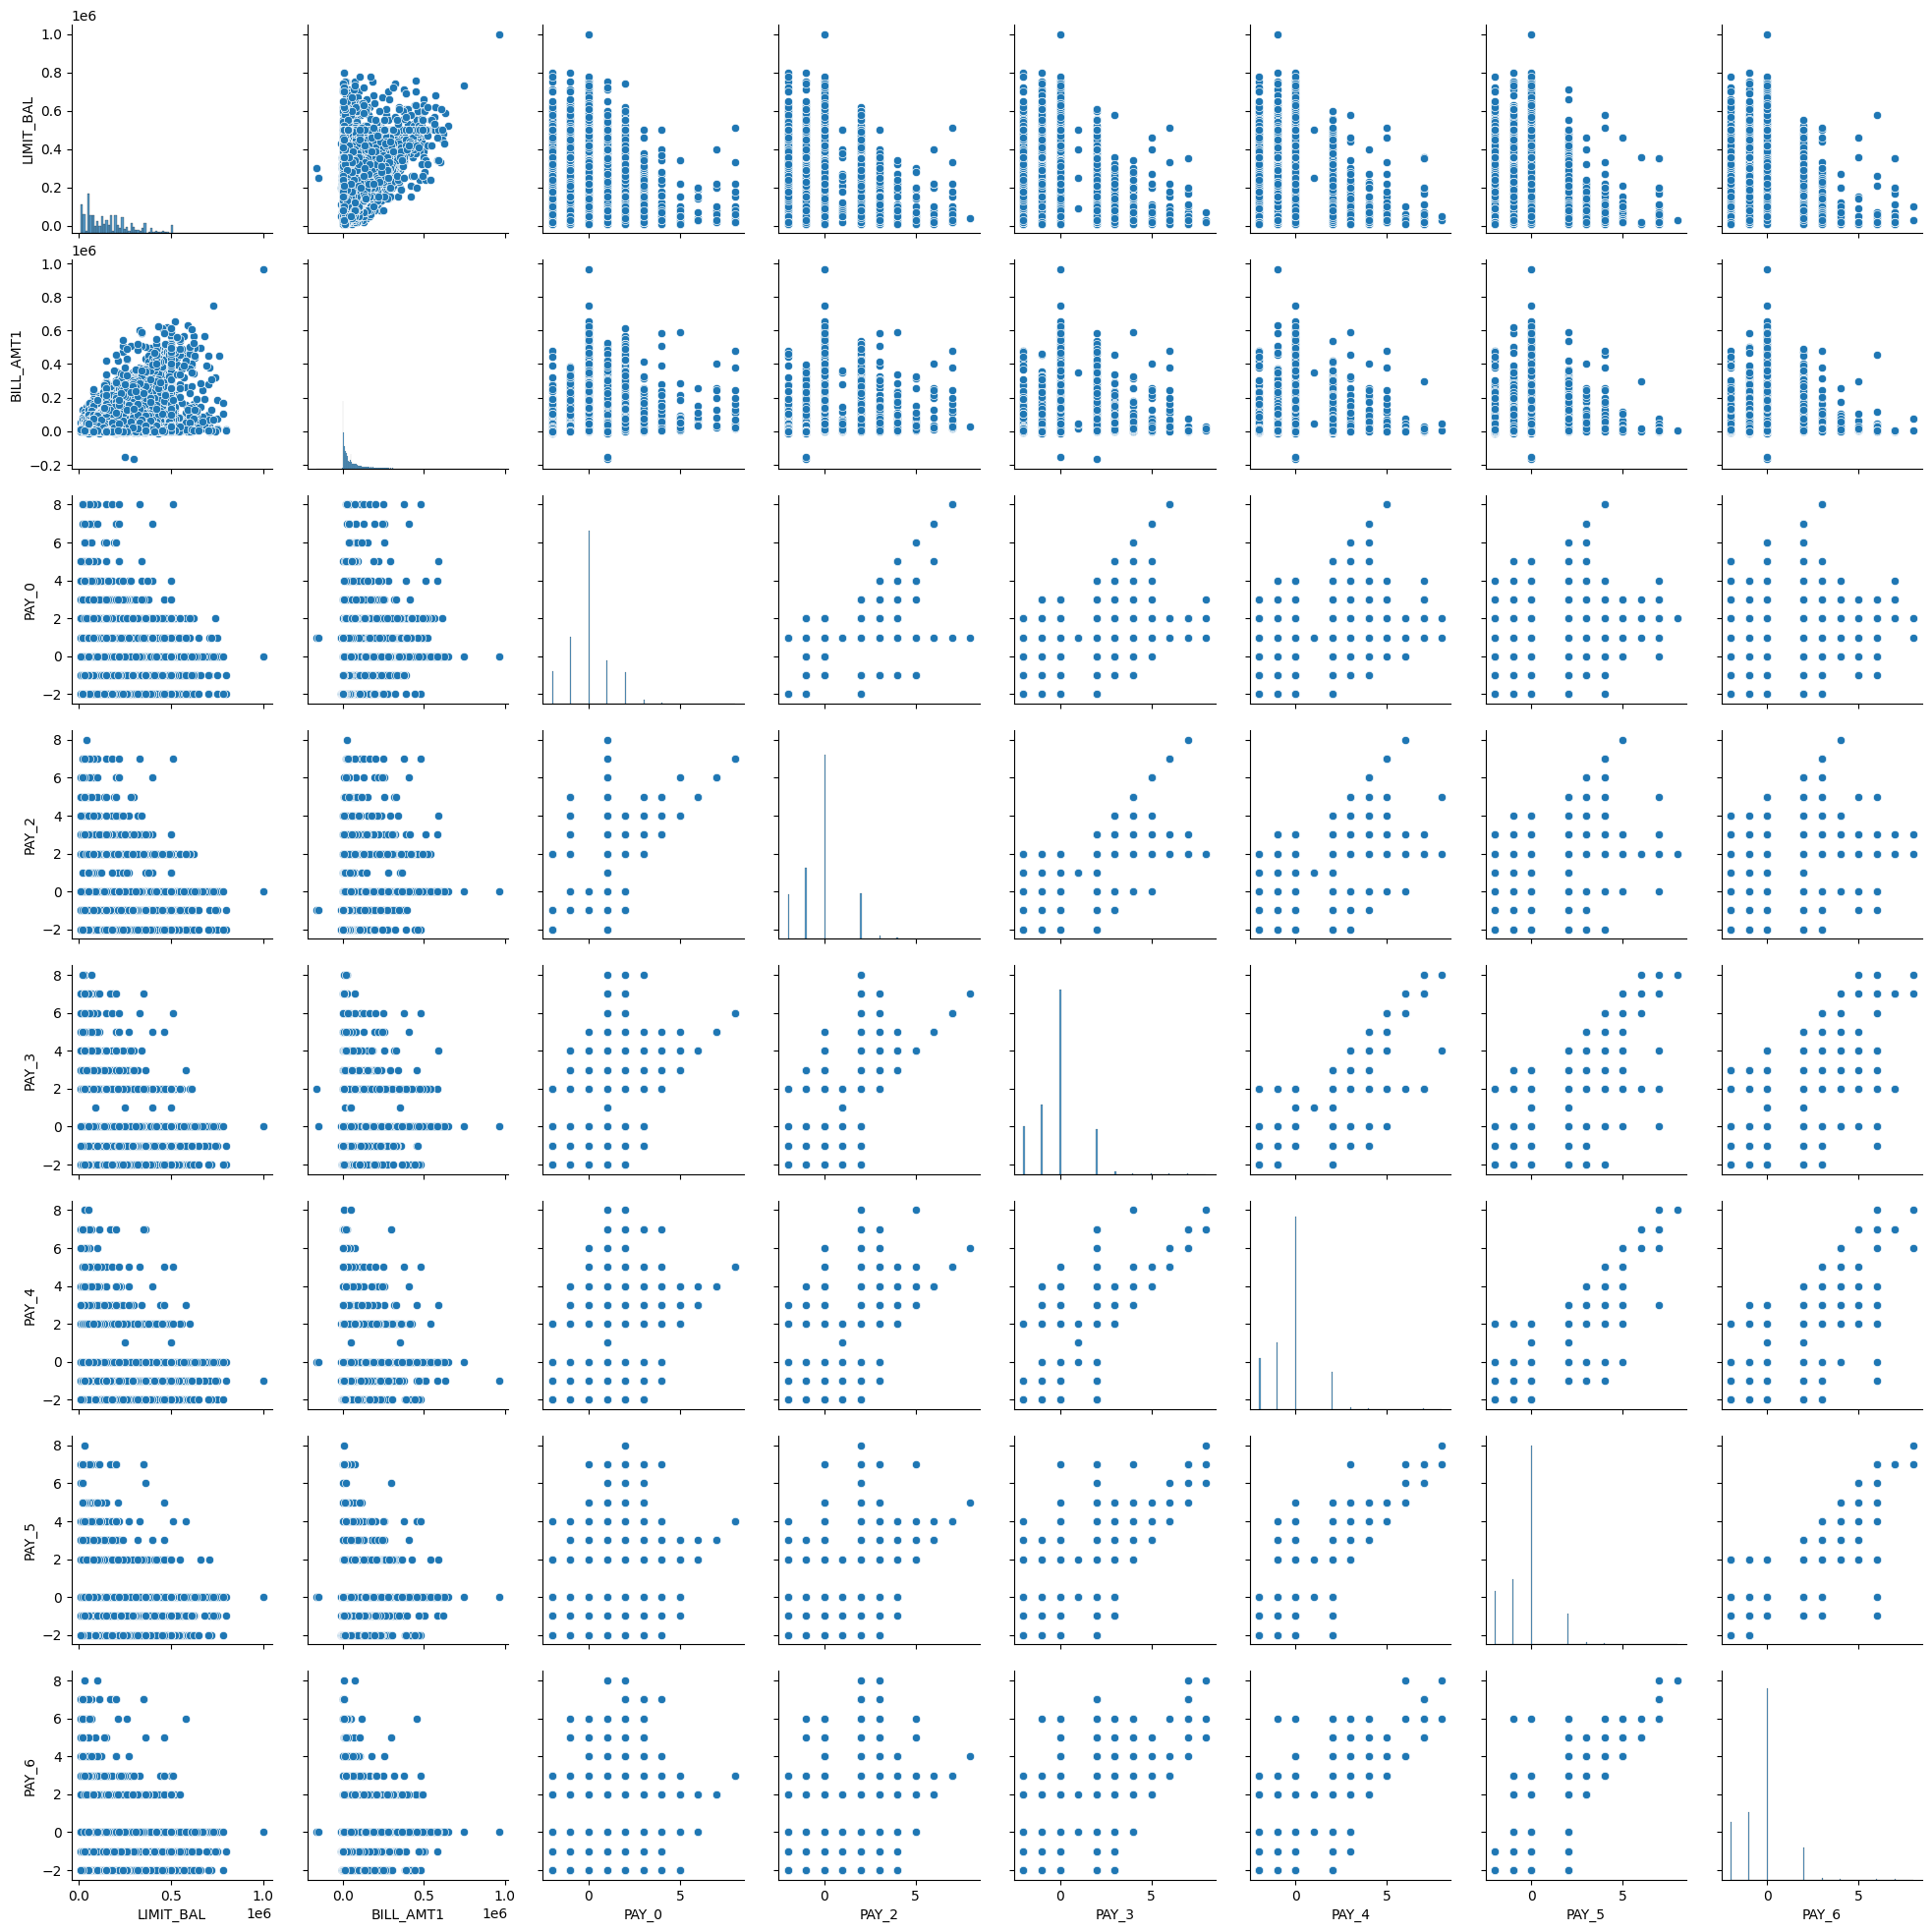

In [10]:
selected_features = ['LIMIT_BAL', 'BILL_AMT1', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
sns.pairplot(df[selected_features])
plt.show()

In [11]:




# Define the target variable and feature columns
X = df.drop(columns=['ID', 'default payment next month'])
y = df['default payment next month']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply one-hot encoding to categorical features
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
encoder = OneHotEncoder(sparse=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Feature scaling for numerical features
numerical_features = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

# Combine the encoded categorical and scaled numerical features
X_train_processed = np.hstack((X_train_encoded, X_train_scaled))
X_test_processed = np.hstack((X_test_encoded, X_test_scaled))

# Apply PCA for dimensionality reduction
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.798
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4687
           1       0.63      0.18      0.28      1313

    accuracy                           0.80      6000
   macro avg       0.72      0.58      0.58      6000
weighted avg       0.77      0.80      0.75      6000



In [12]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Type of regularization
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],  # Optimization algorithm
}

# Initialize logistic regression model
logistic_reg = LogisticRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='accuracy')

# Fit the model to find the best hyperparameters
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Make predictions using the best model
y_pred = best_model.predict(X_test_pca)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Best Hyperparameters:", accuracy)
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy with Best Hyperparameters: 0.7998333333333333
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4687
           1       0.63      0.20      0.31      1313

    accuracy                           0.80      6000
   macro avg       0.72      0.58      0.59      6000
weighted avg       0.77      0.80      0.76      6000



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv